# Zero operator

It was shown in the `completeness_relation.ipynb` notebook that there was some problematic cases where the Mittag-Leffler expansion (MLE) of the completeness relation (CR) presents large oscillations and does follow the exact completeness relation, sometimes not even converging to 1, as expected. It was however shown that for the less problematic of these cases, a convergence to 1 was expected to happen, however requiring a large number of resonant couples.

A more explicit way of observing that fact is to study the so-called Zero-Operator (ZO), presented in [P. Lind, *PRC* **47**, 5 (1993)](http://journals.aps.org/prc/abstract/10.1103/PhysRevC.47.1903). The MLE of this zero-operator is given by:

$ZO_{MLE}(k) = \frac{1}{2} \sum_{S=a,b} \frac{\left( g | \varphi_S \right)^2}{ k_S \left\langle g | g \right\rangle } + 
               \frac{1}{2} \sum_{S=c,d}^{|k_S| \leq |k|} \frac{\left( g | \varphi_S \right)^2}{ k_S \left\langle g | g \right\rangle }$
               
It will be shown that this operator tends to the expected zero value even in the problematic cases of rectangular test functions close to the borders of region $II$. The values of the zero operator are purely imaginary.

**Import useful modules and classes.**

In [1]:
# Make the notebook aware of some of the SiegPy module classes
from siegpy import SWPBasisSet, Rectangular
# Other imports
import numpy as np
import matplotlib.pyplot as plt

## Create a basis set of Siegert states

To save computation time, the Siegert states are read from a file. They all are solutions of the same Hamiltonian, that is, using the same 1D square-well potential.

In [2]:
# Initialize the Siegert states from a file
siegerts = SWPBasisSet.from_file('siegerts.dat')

# Find the width of the potential
pot = siegerts[0].potential
l = pot.width

## Compute the convergence of the zero operator

This is done through the `MLE_zero_operator_convergence` method of a `SWPBasisSet` object. This requires to pass a test function as argument. Rectangular test functions will be used throughout this notebook, that will be organized in two parts, the first one corresponding to the case of centered rectangular test functions, the other concentrating on non-centered rectangular test functions.

### Centered rectangular test functions

#### Smaller widths (non-problematic cases for the CR)

Let us start by computing the convergence of the MLE of the ZO for centered test functions of small width. This cases are not problematic with respect to the convergence of the MLE of the CR Their width is measured in potential width unit.

In [3]:
# Define the parameters for the test function:
# - center
x_c = 0.0
# - width (in potential width unit)
small_normalized_widths = [0.001, 0.01, 0.05, 0.1, 0.25, 0.5]

# compute the convergence of the MLE of the zero-operator
ZOs_small_centered = []
for a_over_l in small_normalized_widths:
    rect = Rectangular.from_width_and_center(a_over_l*l, x_c)
    ZOs_small_centered.append(siegerts.MLE_zero_operator_convergence(rect))

We can then plot the results:

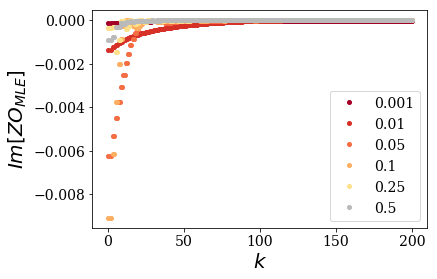

In [4]:
colors = ['#a50026','#d73027','#f46d43','#fdae61','#fee08b','#bababa']
for i, ZO in enumerate(ZOs_small_centered):
    plt.plot(ZO[0], np.imag(ZO[1]), color=colors[i], \
             label=small_normalized_widths[i], marker='o', ms=4, ls='')
plt.xlabel("$k$")
plt.ylabel("$Im[ZO_{MLE}]$")
plt.legend()
plt.show()

This plot is rather difficult to read, so it might be better to look at the individual plots:

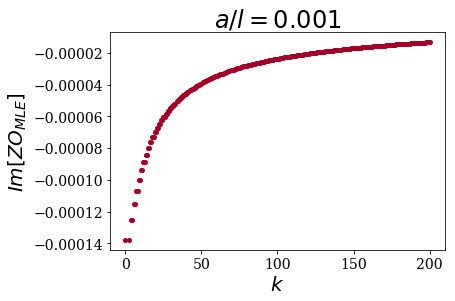

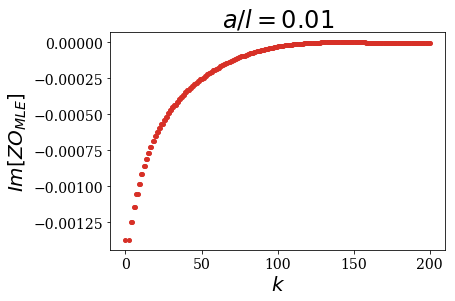

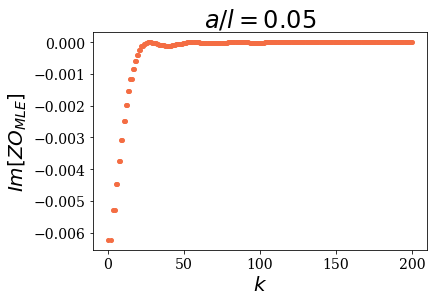

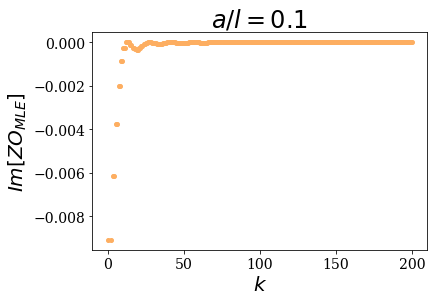

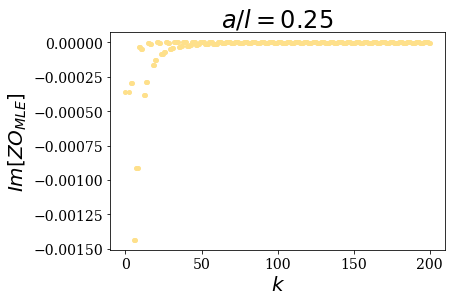

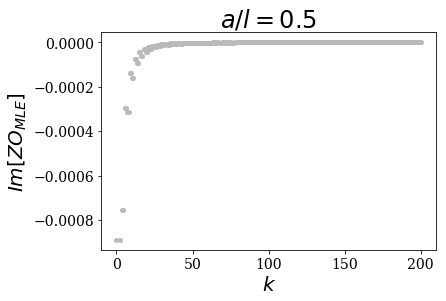

In [5]:
colors = ['#a50026','#d73027','#f46d43','#fdae61','#fee08b','#bababa']
for i, ZO in enumerate(ZOs_small_centered):
    plt.plot(ZO[0], np.imag(ZO[1]), color=colors[i], marker='o', ms=4, ls='')
    plt.title('$a/l = {}$'.format(small_normalized_widths[i]))
    plt.xlabel("$k$")
    plt.ylabel("$Im[ZO_{MLE}]$")
    plt.show()

The MLE of the ZO always converges to zero, with rather small amplitudes around the expected value 0. The oscillations exhibit smaller frequencies as long as the width is reduced.

Another way of plotting these results in a condensed, yet readable, way is to plot the convergences in logarithmic scale. This requires to plot the absolute value of the zero operator rather than its imaginary part.

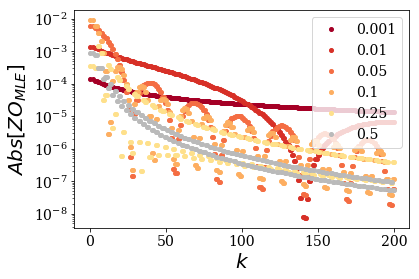

In [6]:
colors = ['#a50026','#d73027','#f46d43','#fdae61','#fee08b','#bababa']
for i, ZO in enumerate(ZOs_small_centered):
    plt.plot(ZO[0], np.abs(ZO[1]), color=colors[i], \
             label=small_normalized_widths[i], marker='o', ms=4, ls='')
plt.xlabel("$k$")
plt.ylabel("$Abs[ZO_{MLE}]$")
plt.yscale('log')
plt.legend()
plt.show()

From this plot, one clearly sees that there is a convergence to 0 of the ZO for all the test functions as long as the number of resonant couples used increases. The slower convergence for the smallest test functions reflects the need of a large number of resonant couples to reach the completeness relation (remember that the exact CR also requires an integral over a larger range of wavenumbers to reach convergence).

#### Larger widths (problematic cases for the CR)

One must start by computing the convergence of the MLE of the ZO for the larger test functions:

In [7]:
# Define the parameters for the test function:
# - center
x_c = 0.0
# - width (in potential width unit)
large_normalized_widths = [0.5, 0.75, 0.9, 0.95, 0.99, 0.999]

# compute the convergence of the MLE of the zero-operator
ZOs_large_centered = []
for a_over_l in large_normalized_widths:
    rect = Rectangular.from_width_and_center(a_over_l*l, x_c)
    ZOs_large_centered.append(siegerts.MLE_zero_operator_convergence(rect))

Similar results are observed for the larger test functions, even though the amplitude of the oscillations is larger than for the smallest test functions:

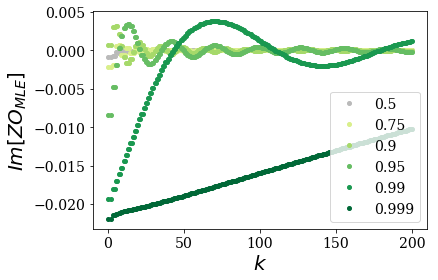

In [8]:
colors = ['#bababa','#d9ef8b','#a6d96a','#66bd63','#1a9850','#006837']
for i, ZO in enumerate(ZOs_large_centered):
    plt.plot(ZO[0], np.imag(ZO[1]), color=colors[i], \
             label=large_normalized_widths[i], marker='o', ms=4, ls='')
plt.xlabel("$k$")
plt.ylabel("$Im[ZO_{MLE}]$")
plt.legend()
plt.show()

Again, the data are plotted in logarithmic units for more readability:

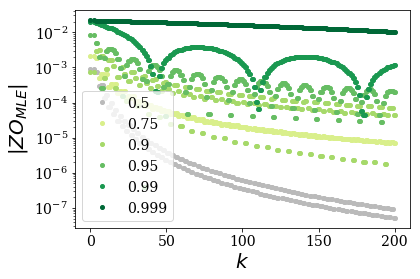

In [9]:
colors = ['#bababa','#d9ef8b','#a6d96a','#66bd63','#1a9850','#006837']
for i, ZO in enumerate(ZOs_large_centered):
    plt.plot(ZO[0], np.abs(ZO[1]), color=colors[i], \
             label=large_normalized_widths[i], marker='o', ms=4, ls='')
plt.xlabel("$k$")
plt.ylabel("$|ZO_{MLE}|$")
plt.yscale('log')
plt.legend()
plt.show()

The difference with the smaller grid extensions is that the ZO is farther away from its expected 0 value, but it still converges to this value as long as more resonant couples are introduced in the discrete sum.

### Non-centered rectangular test functions

This time, the width of the test functions is fixed to a given value, while its center is increased to reach the limit of region $II$. The center of the test function is therefore counted in maximal center units.

In [10]:
# Define the parameters for the test function:
# - width 
a = 0.5 * l
# - centers (in maximal center unit)
x_c_max = (l - a) / 2
normalized_centers = [0.001, 0.05, 0.25, 0.5, 0.75, 0.95, 0.999]

# compute the convergence of the MLE of the zero-operator
ZOs_uncentered = []
for x_c_over_x_c_max in normalized_centers:
    rect = Rectangular.from_width_and_center(a, x_c_over_x_c_max * x_c_max)
    ZOs_uncentered.append(siegerts.MLE_zero_operator_convergence(rect))

We can then plot the results:

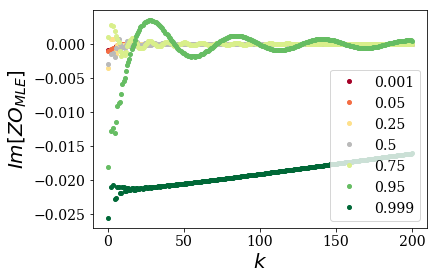

In [11]:
colors = ['#a50026','#f46d43','#fee08b','#bababa','#d9ef8b','#66bd63','#006837']
for i, ZO in enumerate(ZOs_uncentered):
    plt.plot(ZO[0], np.imag(ZO[1]), color=colors[i], \
             label=normalized_centers[i], marker='o', ms=4, ls='')
plt.xlabel("$k$")
plt.ylabel("$Im[ZO_{MLE}]$")
plt.legend()
plt.show()

This situation is very similar to the centered case, as the convergence for the most problematic cases may still be inferred. It is still rather difficult to read this plot, so it might be better to look at the individual plots:

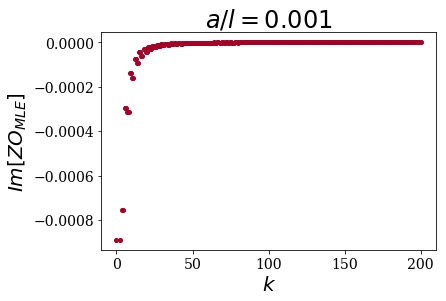

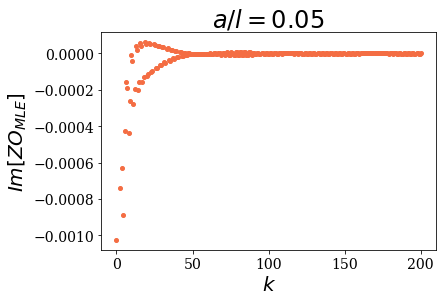

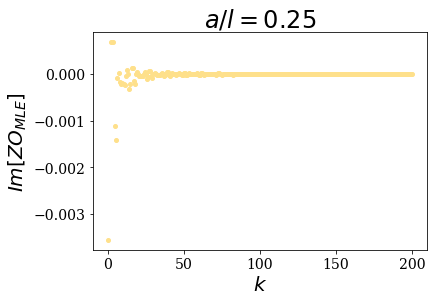

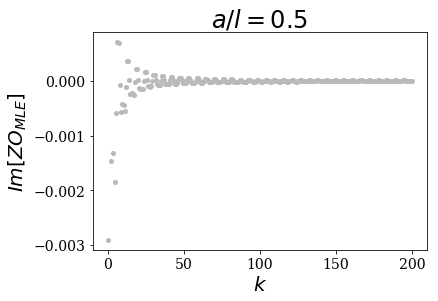

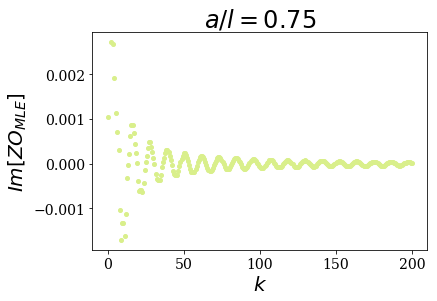

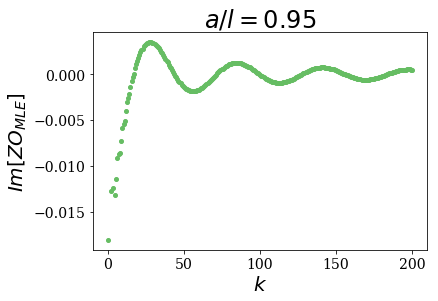

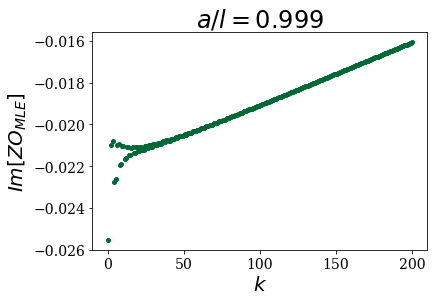

In [12]:
colors = ['#a50026','#f46d43','#fee08b','#bababa','#d9ef8b','#66bd63','#006837']
for i, ZO in enumerate(ZOs_uncentered):
    plt.plot(ZO[0], np.imag(ZO[1]), color=colors[i], marker='o', ms=4, ls='')
    plt.title('$a/l = {}$'.format(normalized_centers[i]))
    plt.xlabel("$k$")
    plt.ylabel("$Im[ZO_{MLE}]$")
    plt.show()

The MLE of the ZO always converges to zero. It generally oscillates around the expected value 0. The oscillations are damped, as long as more resonant couples are used in the sum. It nonetheless requires a larger number of them to observe such a fact when the test function is very close to the border of region $II$.

Another way of plotting these results in a condensed way is to use a logarithmic scale. This still requires to plot the absolute value of the zero operator rather than its imaginary part. The fact that the test function is not centered makes it more difficult to read, given the more complex oscillations.

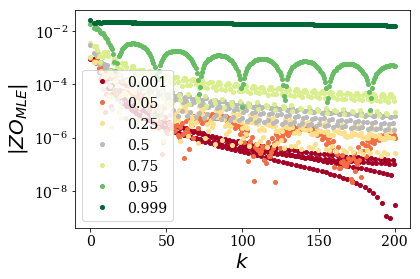

In [13]:
colors = ['#a50026','#f46d43','#fee08b','#bababa','#d9ef8b','#66bd63','#006837']
for i, ZO in enumerate(ZOs_uncentered):
    plt.plot(ZO[0], np.abs(ZO[1]), color=colors[i], \
             label=normalized_centers[i], marker='o', ms=4, ls='')
plt.xlabel("$k$")
plt.ylabel("$|ZO_{MLE}|$")
plt.yscale('log')
plt.legend()
plt.show()

This concludes this study of the zero operator, that shows that even in the most problematic case, the convergence of the Mittag-Leffler expansion of the completeness relation is expected when a large number of resonant couples is used.